## Import

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer

import pickle
import warnings

warnings.filterwarnings("ignore")
sns.set()

In [ ]:
#url ='https://www.kaggle.com/competitions/bluebook-for-bulldozers/data?select=TrainAndValid.csv'

df=pd.read_csv('/content/drive/MyDrive/TrainAndValid.csv')
df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
108335,1439410,25000.0,971872,7122,132,1.0,1990,NaN,NaN,12/18/1997 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364410,2538320,20000.0,1542009,3538,149,1.0,1998,5889.0,Medium,6/16/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287090,2202139,5250.0,1337381,6632,136,8.0,1995,0.0,NaN,7/16/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407683,6269926,47500.0,287698,1586,149,1.0,1995,NaN,NaN,3/28/2012 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
215066,1679109,7500.0,1258591,8724,132,1.0,1000,NaN,NaN,2/20/2003 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(412698, 53)

## Explore

In [ ]:
df.select_dtypes(include='object').sample(5)

,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
24827,NaN,9/14/1993 0:00,580,580,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Arizona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403844,Medium,4/3/2012 0:00,D5KXL,D5,K,NaN,XL,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Connecticut,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Differential Steer,NaN,NaN
118912,NaN,6/21/2002 0:00,D3,D3,NaN,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Tennessee,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
320552,NaN,3/25/2010 0:00,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",Georgia,...,None or Unspecified,"12' 10""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
400574,NaN,8/2/2011 0:00,L120E,L120,E,NaN,NaN,Medium,Wheel Loader - 200.0 to 225.0 Horsepower,Illinois,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [ ]:
df.describe(include='all')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,73670,412698,...,102916,102261,102332,102261,102193,80712,81875,81877,71564,71522
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4013,...,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2/16/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35832,1932,...,82444,81539,85074,92924,86998,80692,39633,71447,70169,70774
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(412698, 53)

## Clean & Visualization 

Text(0.5, 1.0, 'Total number of Null value')

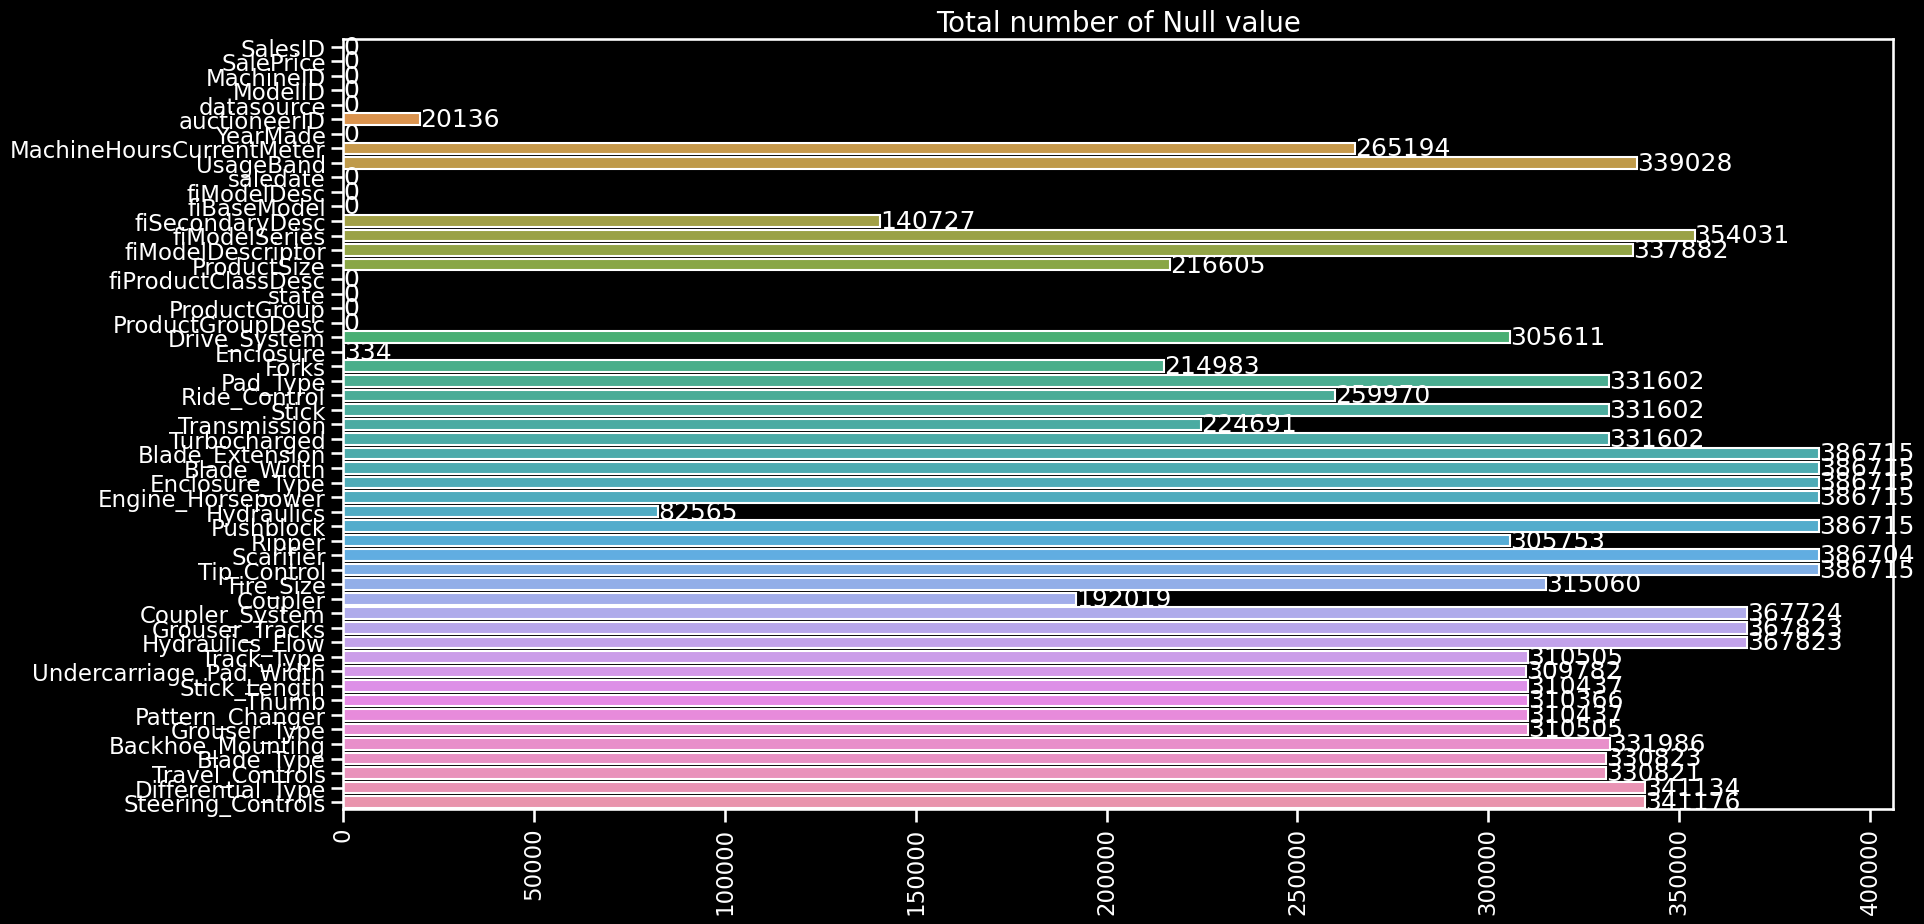

In [ ]:
# visualization before cleaning
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
plots=sns.barplot(y=df.isna().sum().index,x=df.isna().sum())
plt.xticks(rotation=90)
plt.bar_label(plots.containers[0],rotation=0)
plt.title('Total number of Null value',fontsize=20)


In [ ]:
df.fillna(method='ffill',inplace=True)

Text(0.5, 1.0, 'After Cleaning')

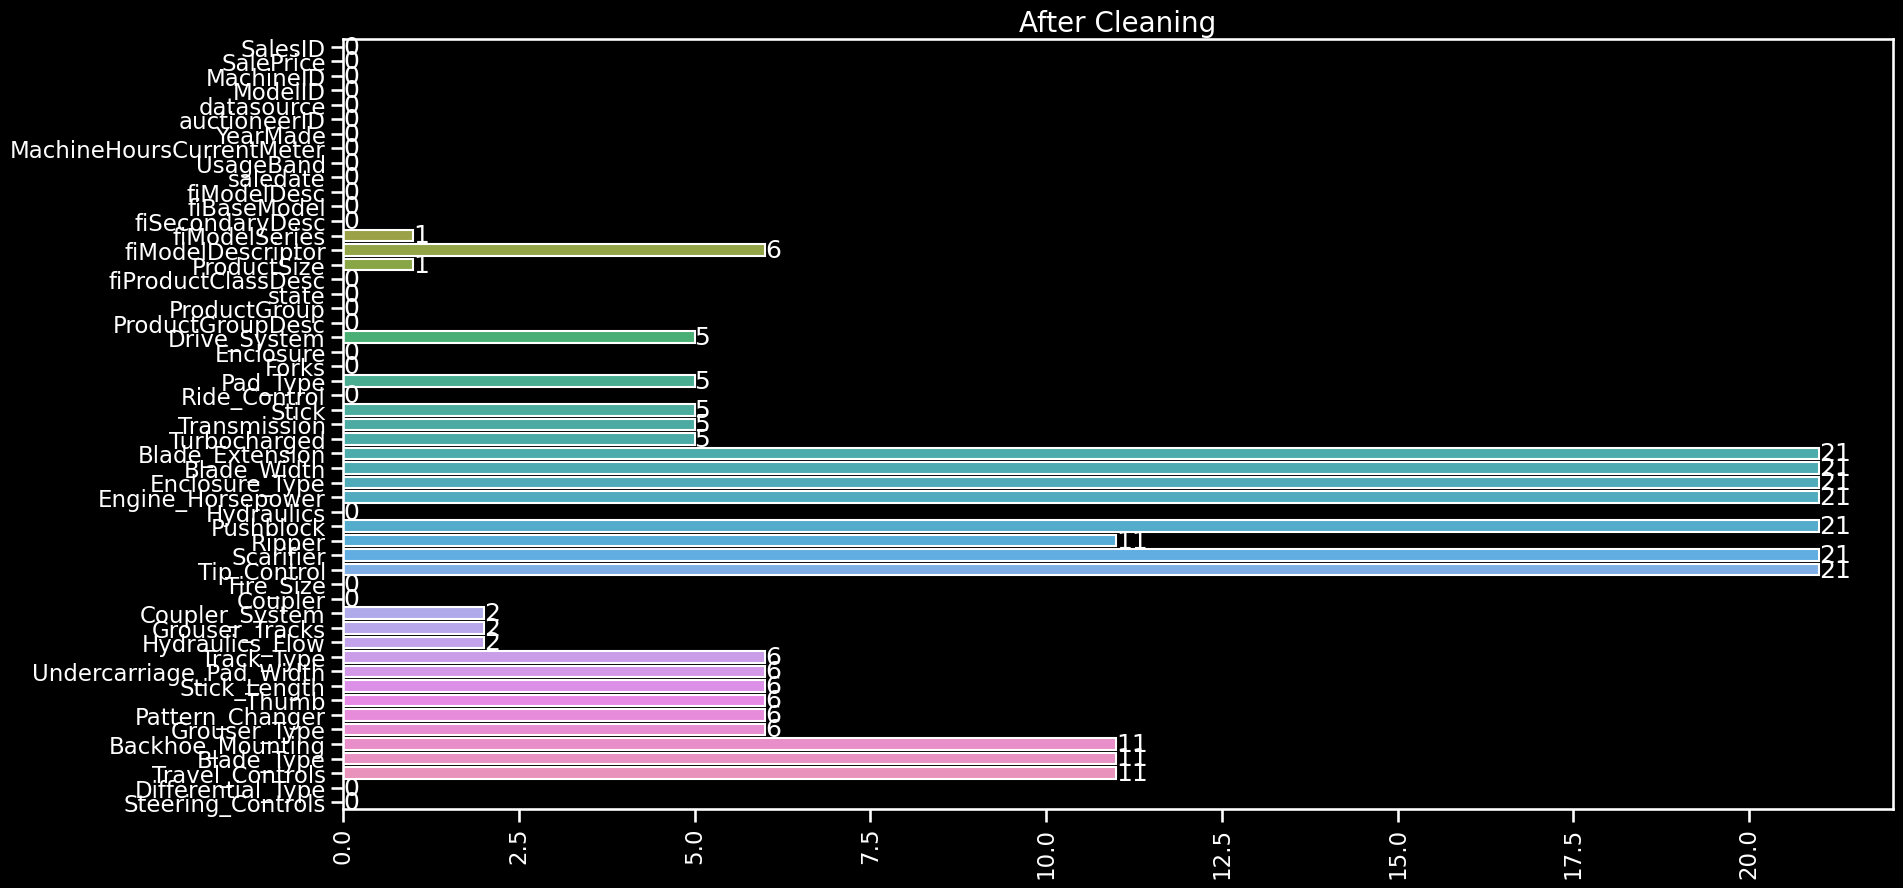

In [ ]:
# Visualization after cleaning
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
plots=sns.barplot(y=df.isna().sum().index,x=df.isna().sum())
plt.xticks(rotation=90)
plt.bar_label(plots.containers[0],rotation=0)
plt.title('After Cleaning',fontsize=20)

In [ ]:
df.dropna(axis=0,how='any',inplace=True)

Text(0.5, 1.0, 'Frequency by state')

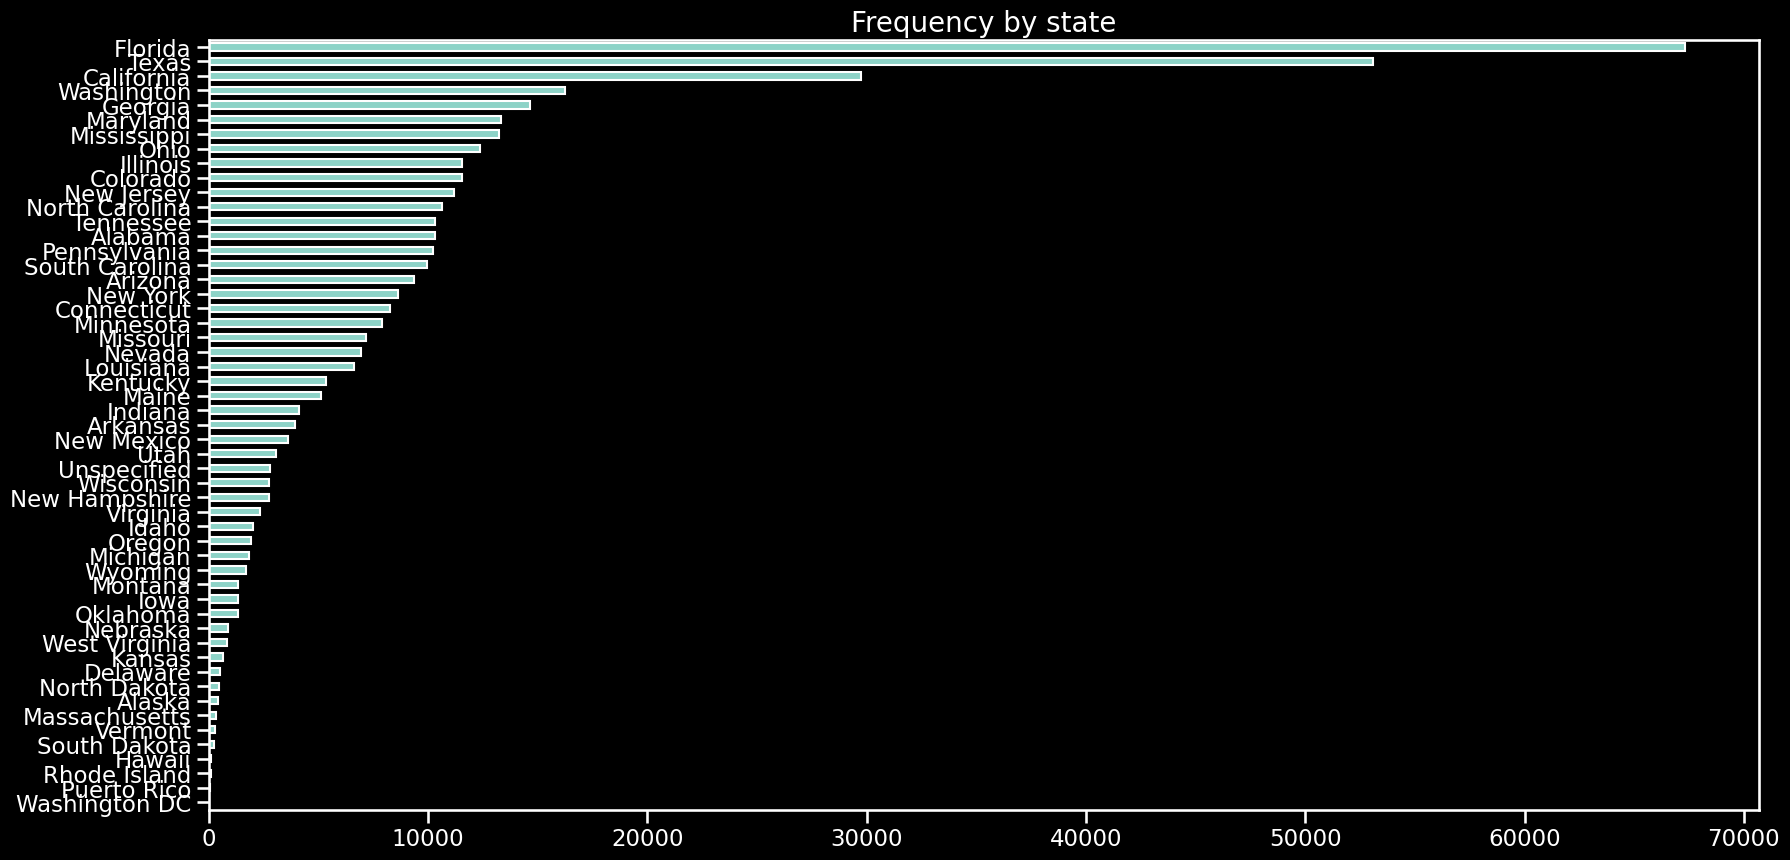

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
df.state.value_counts().sort_values().plot(kind='barh')
plt.title('Frequency by state', fontsize=20)

Text(0.5, 1.0, 'price change by state')

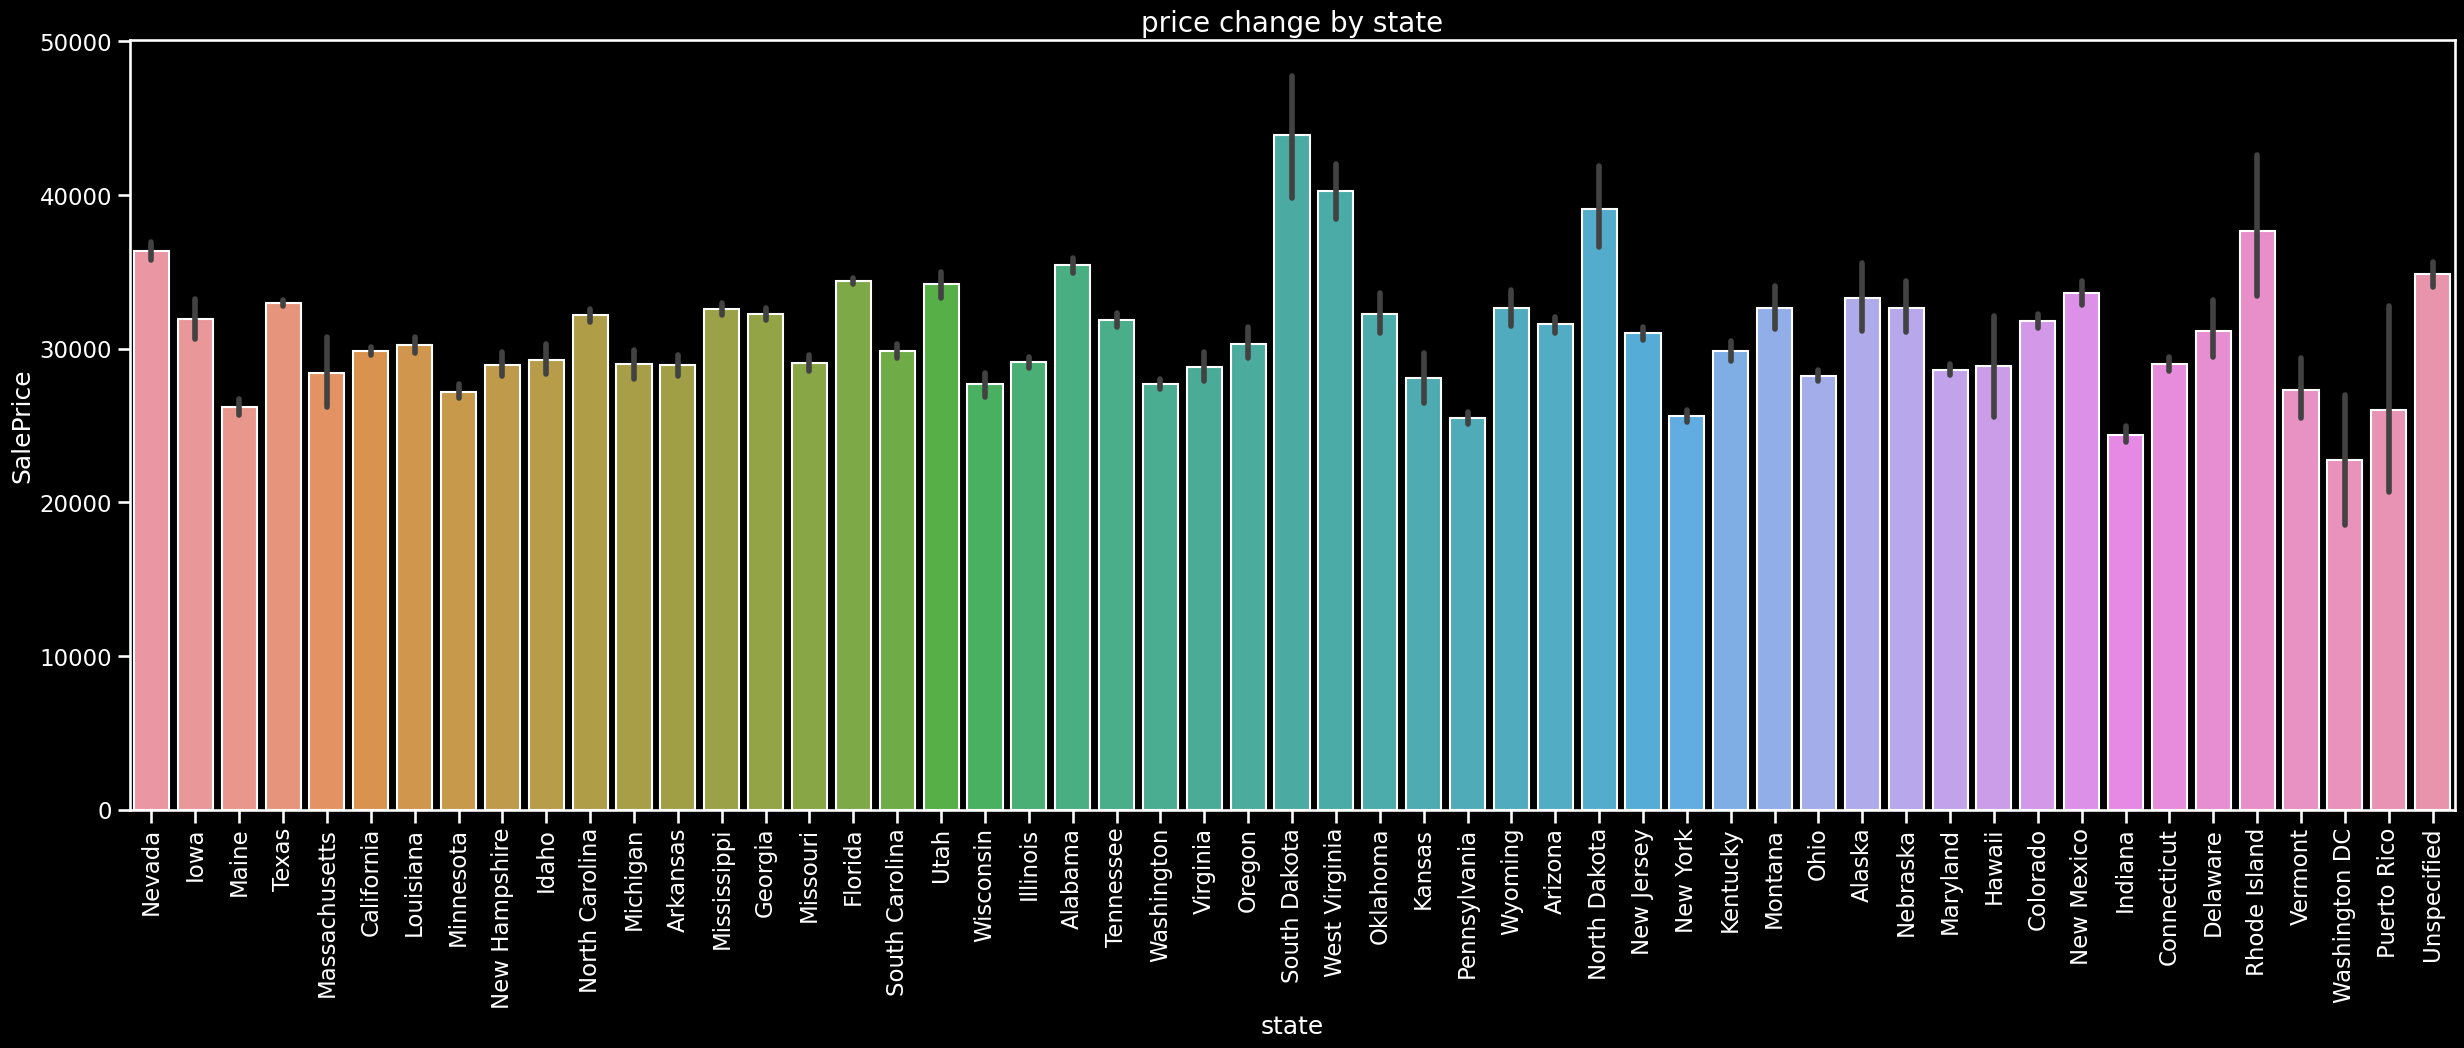

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice')
plt.title('price change by state', fontsize=20)

In [ ]:
# convert to datetime

df['saledate']=df.saledate.astype('datetime64')


In [ ]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
from ipywidgets import widgets, interactive

new = widgets.BoundedFloatText(
    value=df.saleYear.min(),
    min=df.saleYear.min(),
    max=df.saleYear.max(),
    step=1,
    description='Begining:',
    disabled=False,
    color='black'
)
old = widgets.BoundedFloatText(
    value=df.saleYear.max(),
    min=df.saleYear.min(),
    max=df.saleYear.max(),
    step=1,
    description='Ending:',
    disabled=False,
    color='black'
)

zone = widgets.Dropdown(
    options=['All'] + list(df['saleDayOfWeek'].unique()),
    value=3,
    description='saleDayOfWeek:',
)

def plotit(zone, new, old):

    if new > old:
        print("invalid")
    else:
        temp_d = df.copy()
        if zone != 'All':
            temp_d = temp_d[temp_d.saleDayOfWeek == zone]

        temp_d = temp_d[(temp_d.saleYear >= new) & (temp_d.saleYear <= old)]

        if len(temp_d) > 0:
            temp_d.groupby(['saleYear', 'saleDayOfWeek']).sum().unstack().plot(kind='bar', stacked=True, legend = False,title="SalesPerWeekPerYear = {}".format(zone))
            plt.show();
        else:
            print("invalid")
interactive(plotit, zone=zone, new=new, old=old)

interactive(children=(Dropdown(description='saleDayOfWeek:', index=1, options=('All', 3, 4, 2, 1, 0, 6, 5), va…

In [ ]:
df.ProductGroupDesc

21             Motor Graders
22          Track Excavators
23              Wheel Loader
24           Backhoe Loaders
25        Skid Steer Loaders
                 ...        
412693      Track Excavators
412694      Track Excavators
412695      Track Excavators
412696      Track Excavators
412697      Track Excavators
Name: ProductGroupDesc, Length: 412677, dtype: object

In [ ]:
df.fiModelSeries.nunique()

129

In [ ]:
del df['ProductGroupDesc']
del df['fiProductClassDesc']
del df['fiSecondaryDesc']
del df['fiBaseModel']
del df['auctioneerID']
del df['datasource']
del df['SalesID']
del df['MachineID']
del df['ModelID']
del df['saledate']

## spliting into label and feature

In [ ]:
x,y=df[:round(len(df)*0.6)].drop('SalePrice',axis=1),df[:round(len(df)*0.6)]['SalePrice']

In [ ]:
x=pd.get_dummies(x)


## Two Different Data Models 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=1000)
model=model.fit(x_train,y_train)


In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2 = pls2.fit(x_train,y_train)

## Choose a Model to Evaluation

In [ ]:
Dict = {"1": model, "2": pls2}
user_input = input("Choose a model to evaluate: 1 or 2\n")
y_pred=Dict[user_input].predict(x_test)
print(f'R^2: {r2_score(y_test,y_pred).round(2)*100}%')
print(f'mean squared error: {mean_squared_error(y_test,y_pred)}')
print(f'mean absolute error: {mean_absolute_error(y_test,y_pred)}')

Choose a model to evaluate: 1 or 2
2
R^2: 62.0%
mean squared error: 190935604.92073667
mean absolute error: 10028.807066187725
